# Simple Loss Landscape Visualization

In [156]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
from sklearn.datasets import  make_classification
%matplotlib inline

In [162]:
# Generate fake toy dataset
X, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, flip_y = 0.8, class_sep = 1)

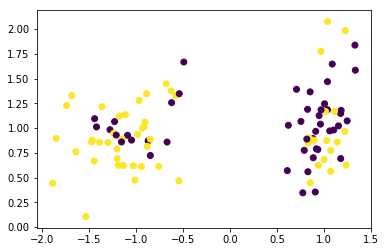

In [163]:
plt.scatter(X[:, 0], X[:, 1], c = y )

## One Neuron Model

In [164]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def unit(x, theta, bias):
    z = 0
    for i in range(len(theta)):
        z += x[i]*theta[i]
    z += bias
    return sigmoid(z)
    
def loss(X, y, theta, bias):
    # LogLoss
    logLoss = 0
    for i in range(X.shape[0]):
        xi = X[i]
        hi = unit(xi, theta, bias)
        error = 0
        if y[i] == 1:
            error = y[i] * np.log(hi)
        elif y[i] == 0:
            error = (1-y[i]) * np.log(1-hi)
        logLoss += error
    logLoss /= -X.shape[0]
    return logLoss
    

In [165]:
loss(X,y,np.asarray([15,2]),0)

10.884166458960165

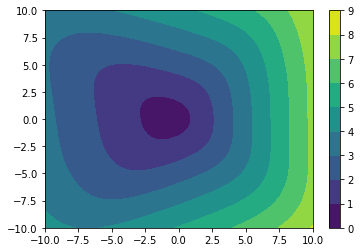

In [166]:
#Plot loss landscape 
size = 50
w1 = np.repeat( np.linspace(-10,10,size), size )
w2 = np.tile( np.linspace(-10,10, size), size ) 
z = np.asarray([ loss(X,y,np.asarray([w1[i],w2[i]]),0)  for i in range(len(w1))])
w1i = np.linspace(min(w1),max(w1),100)
w2i = np.linspace(min(w2),max(w2),100)
zi = griddata((w1,w2),z,(w1i[None:,],w2i[:,None]),method='linear',fill_value=0.0)
plt.contourf(w1i,w2i,zi)
plt.colorbar()
plt.show()